In [1]:
from astropy.table import Table
from synphot import SourceSpectrum, SpectralElement, units
from synphot.models import Empirical1D
from synphot.models import BlackBodyNorm1D
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [3]:
wantmag = 16.5
startmp = 5180.0
filternam = 'cs_sdss-r'

In [4]:
if filternam == 'R':
    filfil = 'Filters/Johnson-R.ecsv'
    rangelow = 5500
    rangehigh = 9000
elif filternam == 'sdss-r':
    filfil = 'Filters/sdss-r.ecsv'
    rangelow = 5000
    rangehigh = 7500
elif filternam == 'cs_sdss-r':
    filfil = 'Filters/cs_sdss.ecsv'
    rangelow = 5000
    rangehigh = 7500
filtertrans = Table.read(filfil, format='ascii.ecsv')
normfilt = Table.read('Filters/Johnson-R.ecsv', format='ascii.ecsv')

In [5]:
vegasp = SourceSpectrum.from_vega()

In [6]:
filterse = SpectralElement(Empirical1D, points=filtertrans['Wavelength (A)'], lookup_table=(
    filtertrans['Transmittance']))
normfiltse = SpectralElement(
    Empirical1D, points=normfilt['Wavelength (A)'], lookup_table=(normfilt['Transmittance']))
starspec = SourceSpectrum(BlackBodyNorm1D, temperature=startmp)
starspec_norm = starspec.normalize(
    wantmag * units.VEGAMAG, normfiltse, vegaspec=vegasp)

In [7]:
starthrough = filterse * starspec_norm

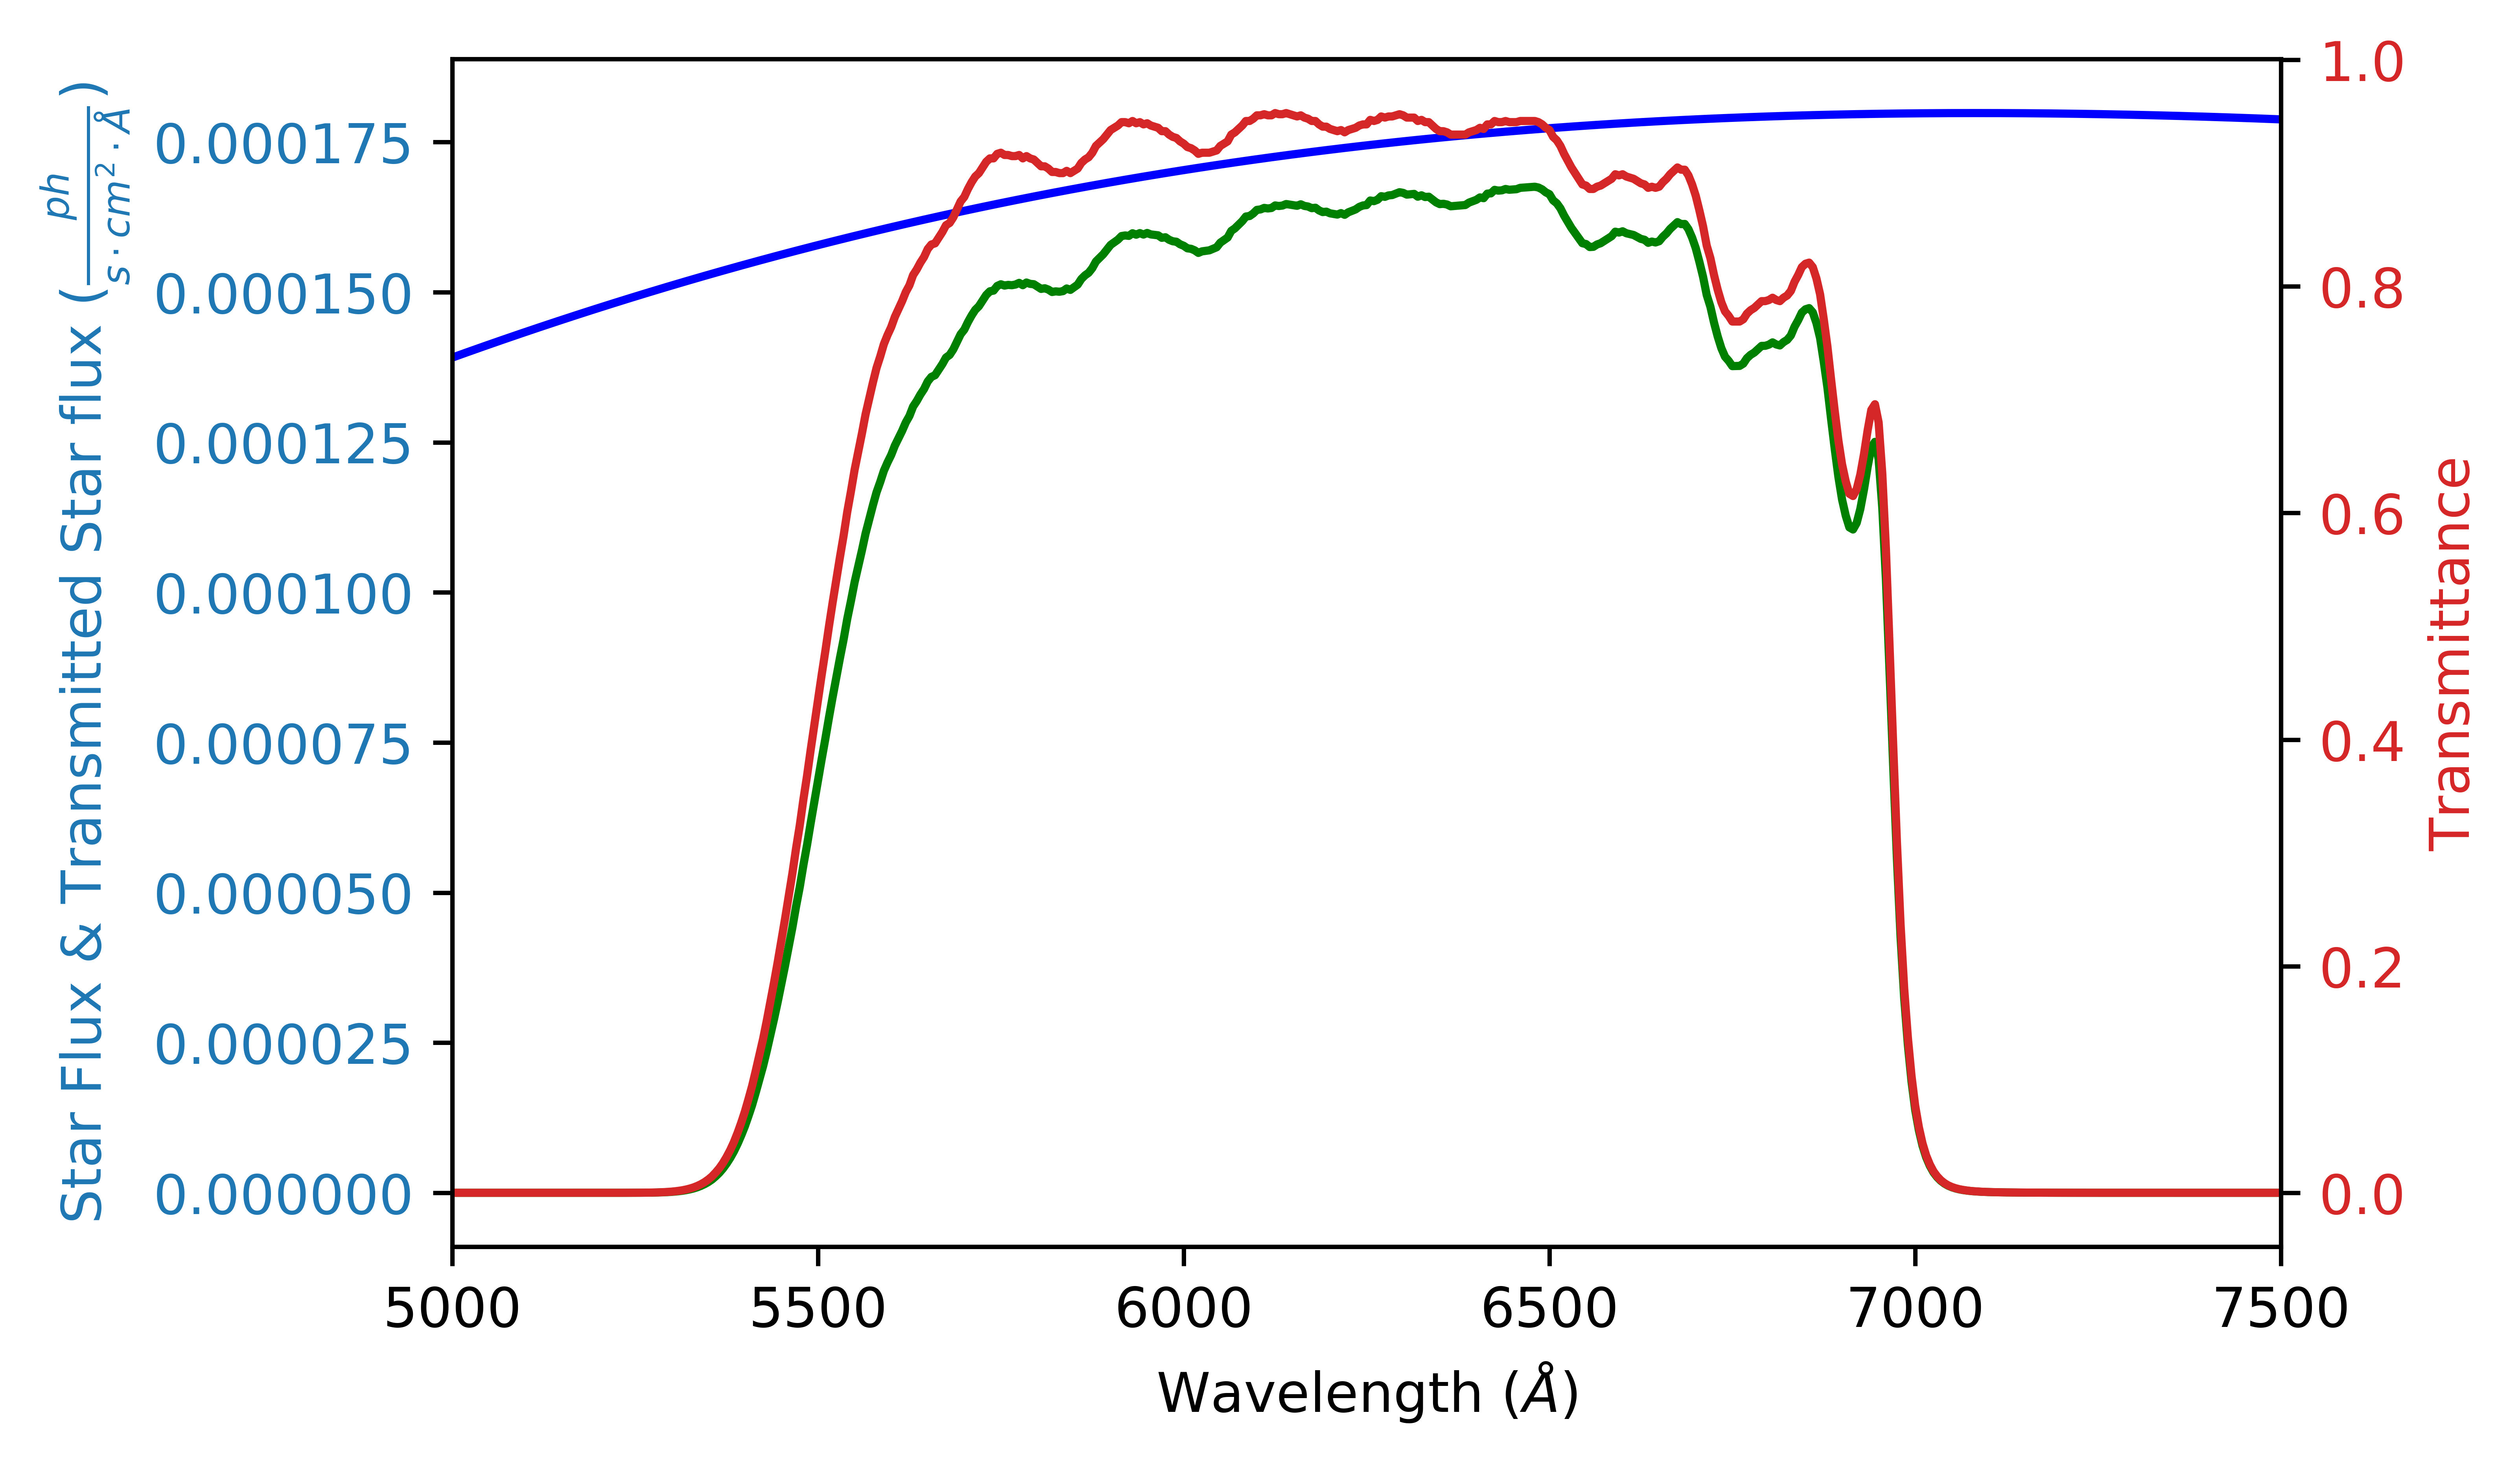

In [8]:
plt.rcParams['figure.dpi'] = 1000
wave = starthrough.waveset
wave1 = filterse.waveset
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel(r'Wavelength ($\AA$)')
ax1.set_ylabel(
    r'Star Flux & Transmitted Star flux $(\frac{ph}{s\cdot{}cm^{2}\cdot{}\AA})$', color=color)
ax1.plot(wave, starspec_norm(wave), 'b')
ax1.plot(wave, starthrough(wave), 'g')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(rangelow, rangehigh)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Transmittance', color=color)
ax2.plot(wave1, filterse(wave1), color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.savefig(('Results/'+filternam+'_curve'+'.png'), dpi=1000,
            facecolor='w', edgecolor='w', bbox_inches='tight', pad_inches=0.0)

In [9]:
startot = starthrough.integrate()

In [10]:
startot

<Quantity 0.2249334311268516 ph / (cm2 s)>

In [11]:
filer = open(('Results/'+filternam+'_star'+'.dat'), 'w')
filer.write(str(startot.to_value())+'\t photons/s/cm^2')
filer.close()